In [17]:
%load_ext autoreload
%autoreload 2

In [1]:
import pandas as pd
import os
import sys

# Basic libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# OS and system path handling
import os
import sys

In [2]:
# Add project root directory to system path
path = os.path.abspath("../")
if path not in sys.path:
    sys.path.append(path)

In [3]:
# Import data loading function
from src.data.load_data import load_raw_data

# Load raw dataset
file_path = "student_performance_dataset.csv"
df = load_raw_data(file_path)


Initial Data Inspection

In [4]:
# Preview first few rows
df.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass


In [5]:
# Dataset dimensions
df.shape

(708, 10)

In [6]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  708 non-null    object 
 1   Gender                      708 non-null    object 
 2   Study_Hours_per_Week        708 non-null    int64  
 3   Attendance_Rate             708 non-null    float64
 4   Past_Exam_Scores            708 non-null    int64  
 5   Parental_Education_Level    708 non-null    object 
 6   Internet_Access_at_Home     708 non-null    object 
 7   Extracurricular_Activities  708 non-null    object 
 8   Final_Exam_Score            708 non-null    int64  
 9   Pass_Fail                   708 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 55.4+ KB


In [7]:
# Summary statistics for numerical and categorical features
df.describe(include="all")

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
count,708,708,708.000000,708.000000,708.000000,708,708,708,708.000000,708
unique,500,2,NaN,NaN,NaN,4,2,2,NaN,2
top,S235,Female,NaN,NaN,NaN,Bachelors,No,No,NaN,Pass
freq,6,375,NaN,NaN,NaN,189,381,361,NaN,354
mean,NaN,NaN,26.132768,78.107722,77.871469,NaN,NaN,NaN,58.771186,NaN
std,NaN,NaN,8.877727,13.802802,14.402739,NaN,NaN,NaN,6.705877,NaN
min,NaN,NaN,10.000000,50.116970,50.000000,NaN,NaN,NaN,50.000000,NaN
25%,NaN,NaN,19.000000,67.550094,65.000000,NaN,NaN,NaN,52.000000,NaN
50%,NaN,NaN,27.000000,79.363046,79.000000,NaN,NaN,NaN,59.500000,NaN
75%,NaN,NaN,34.000000,89.504232,91.000000,NaN,NaN,NaN,64.000000,NaN


Missing Value Analysis

In [8]:
# Count missing values per column
df.isnull().sum()

Student_ID                    0
Gender                        0
Study_Hours_per_Week          0
Attendance_Rate               0
Past_Exam_Scores              0
Parental_Education_Level      0
Internet_Access_at_Home       0
Extracurricular_Activities    0
Final_Exam_Score              0
Pass_Fail                     0
dtype: int64

In [9]:
# Percentage of missing values
df.isnull().mean() * 100

Student_ID                    0.0
Gender                        0.0
Study_Hours_per_Week          0.0
Attendance_Rate               0.0
Past_Exam_Scores              0.0
Parental_Education_Level      0.0
Internet_Access_at_Home       0.0
Extracurricular_Activities    0.0
Final_Exam_Score              0.0
Pass_Fail                     0.0
dtype: float64

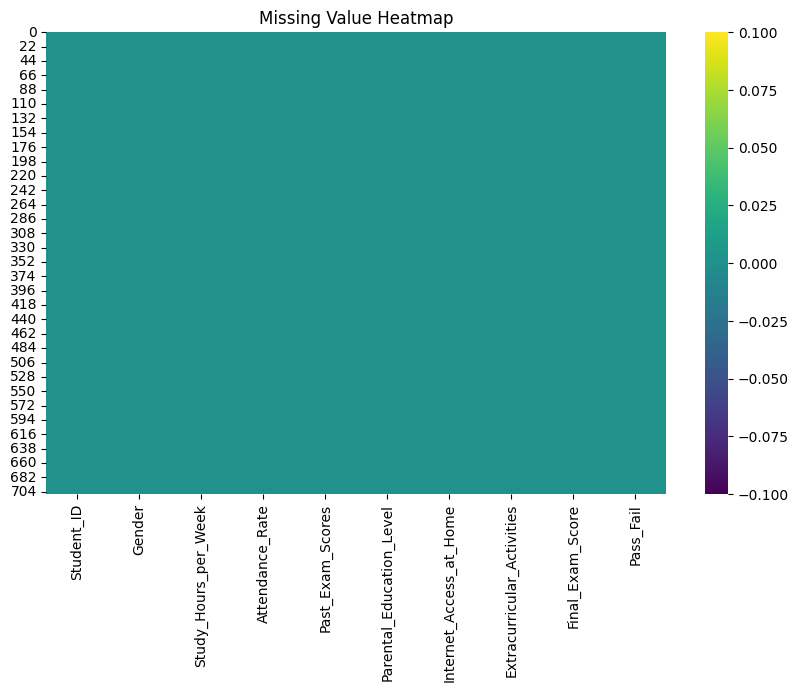

In [ ]:
# Visualize missing data pattern
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()

Univariate Analysis – Numerical Features

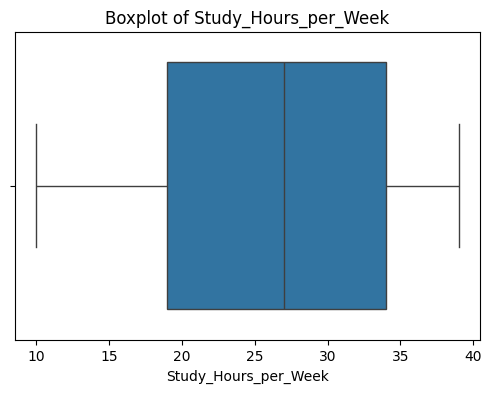

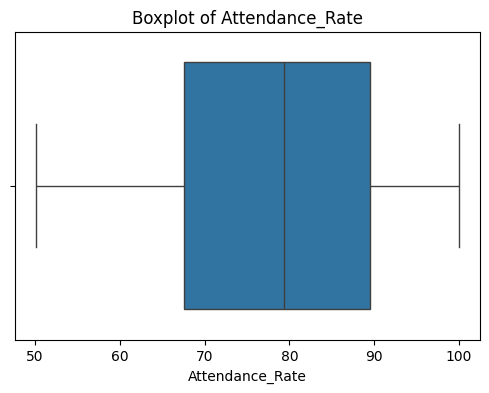

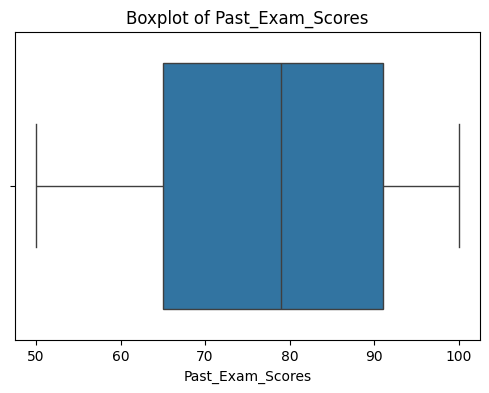

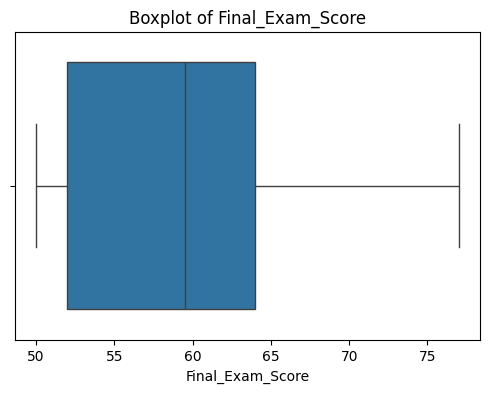

In [12]:
# Boxplots to identify outliers
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


Univariate Analysis – Categorical Features

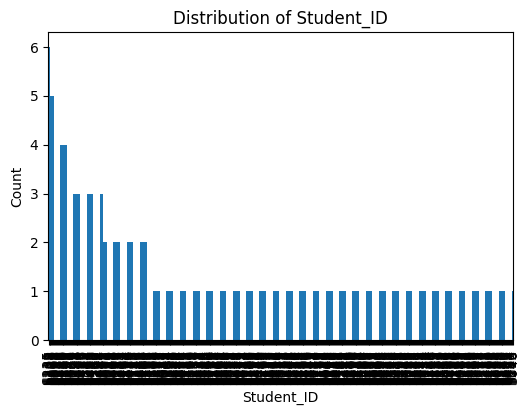

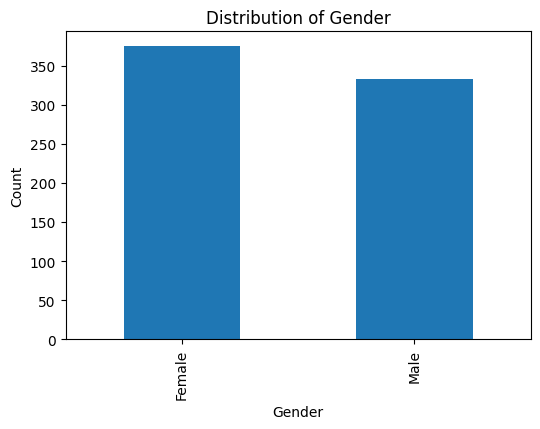

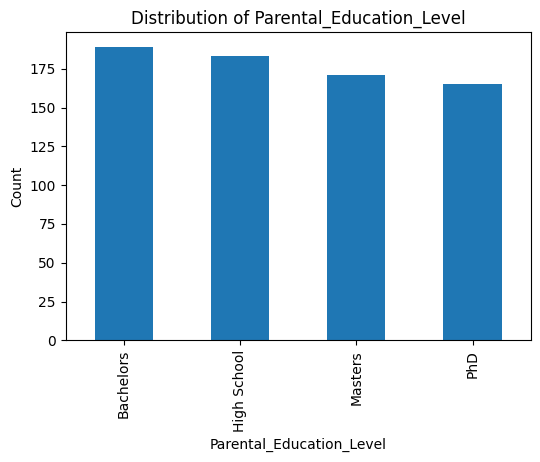

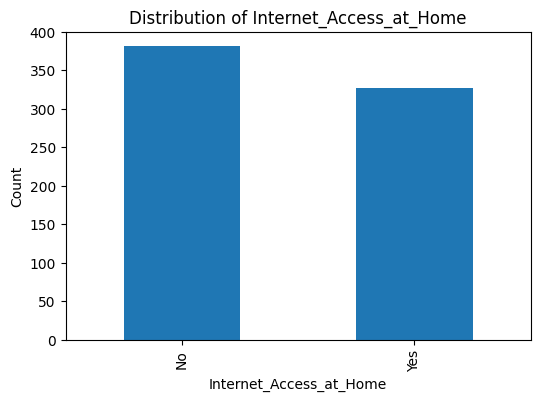

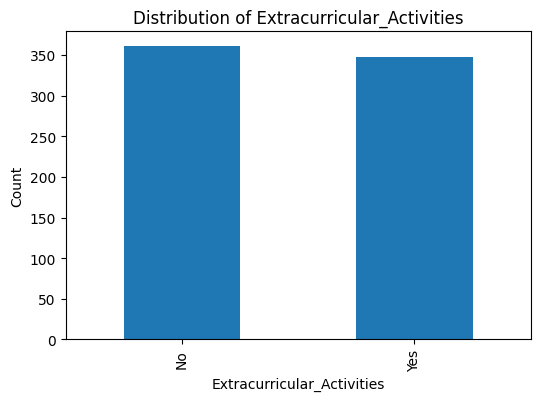

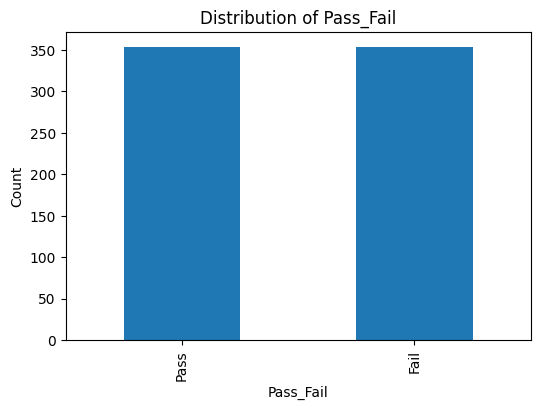

In [13]:
# Select categorical columns
cat_cols = df.select_dtypes(include=["object", "category"]).columns

# Bar plots for categorical features
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

Bivariate Analysis – Numerical vs Numerical

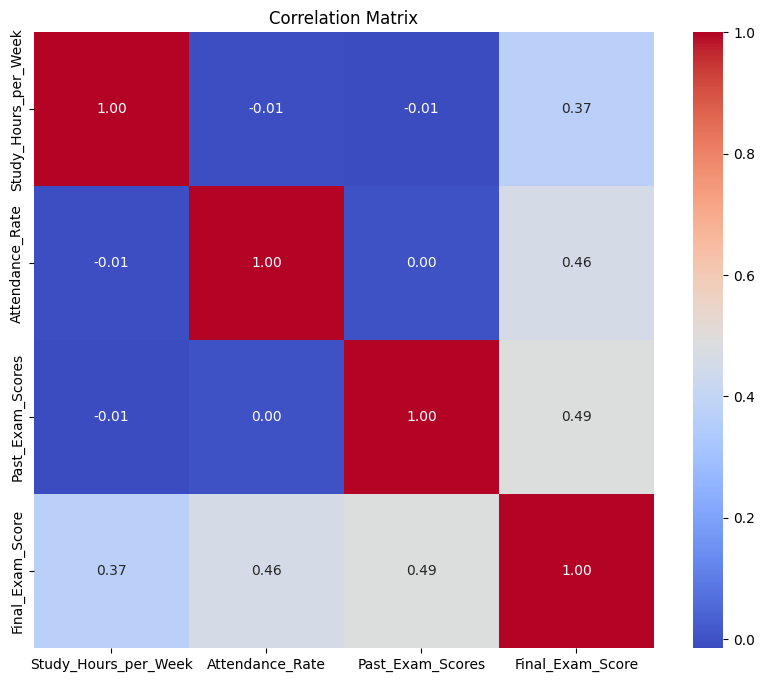

In [14]:
# Correlation matrix
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


Multivariate Analysis

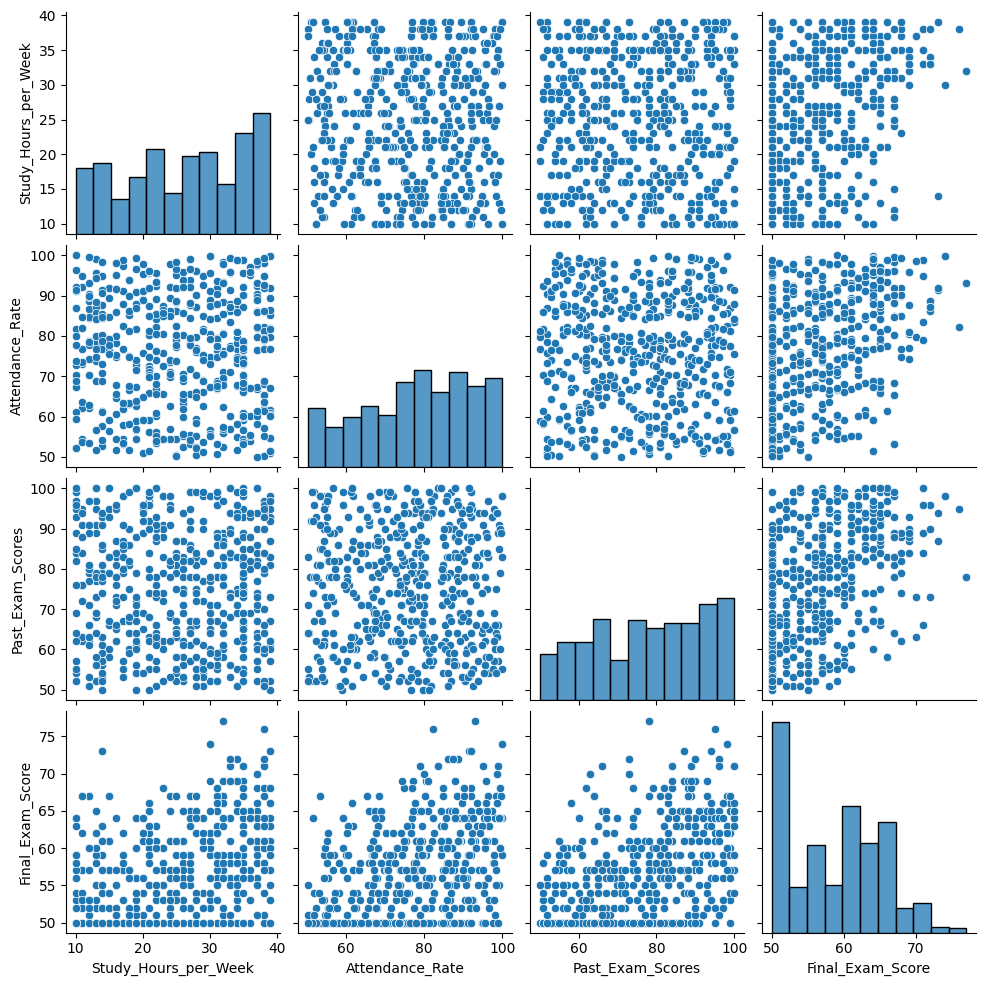

In [16]:
# Pair plot for numerical features
sns.pairplot(df[num_cols])
plt.show()

### Hypotheses Generated from EDA

- Certain academic or behavioral factors are strongly correlated with student performance.
- Some numerical features may require transformation due to skewness.
- Outliers may influence model performance and should be reviewed during preprocessing.
- Categorical variables may require encoding before modeling.
